In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
california_housing = datasets.fetch_california_housing(as_frame=True)
df = california_housing.frame
df.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
18589,5.2101,18.0,5.817308,1.055288,1278.0,3.072115,37.08,-122.14,3.340
12988,4.4489,16.0,5.966549,1.051056,1674.0,2.947183,38.69,-121.27,1.456
14432,3.2250,21.0,4.514870,1.076208,1011.0,1.879182,32.80,-117.23,2.294
18685,2.9559,22.0,5.909938,1.086957,760.0,2.360248,37.02,-121.83,2.884
18,1.9911,50.0,5.343675,1.085919,990.0,2.362768,37.84,-122.26,1.587
1923,1.7222,15.0,5.748954,1.217573,709.0,2.966527,38.83,-120.79,1.185
13976,4.0333,16.0,14.671329,3.139860,342.0,2.391608,34.13,-116.98,1.339
17741,6.7159,12.0,7.289963,1.040892,985.0,3.661710,37.30,-121.74,3.627
8171,2.7092,35.0,4.389952,1.040670,774.0,1.851675,33.80,-118.12,2.563
13597,2.2917,44.0,3.514019,0.813084,273.0,2.551402,34.09,-117.28,0.908


In [ ]:
HouseAge_list =  df['HouseAge'].values.tolist()
HouseAge_array = df['HouseAge'].values
HouseAge_frame = df['HouseAge']

Population_list = df['Population'].values.tolist()
Population_array = df['Population'].values
Population_frame = df['Population']

In [ ]:
def calculate_covariance(HouseAge_list, Population_list):
  if len(HouseAge_list) != len(Population_list):
        raise ValueError("Lists X1 and X2 must have the same length")

  n = len(HouseAge_list)
  mean_h = sum(HouseAge_list)/ n
  mean_p = sum(Population_list) / n

  covariance = sum((HouseAge_list[i] - mean_h)*(Population_list[i] - mean_p) for i in range(n)) / (n - 1)

  return covariance

calculate_covariance(HouseAge_list, Population_list)

-4222.270582223541

In [ ]:
X1 = df['HouseAge']
X2 = df['Population']
def calculate_correlation(X1, X2):

  if len(X1) != len(X2):
     raise ValueError("Lists X1 and X2 must have the same length")

  n = len(X1)
  mean_X1 = sum(X1)/n
  mean_X2 = sum(X2)/n

  # covariance
  cov = sum((X1[i] - mean_X1) * (X2[i] - mean_X2) for i in range(n)) / (n)

  std_X1 = (sum((x - mean_X1) ** 2 for x in X1) / n) ** 0.5
  std_X2 = (sum((x - mean_X2) ** 2 for x in X2) / n) ** 0.5

  if std_X1 == 0 or std_X2 == 0:
    raise ValueError("Standard deviation cannot be zero")

  correlation = cov/(std_X1 * std_X2)
  return correlation

calculate_correlation(X1, X2)

np.float64(-0.29624423977353703)

In [ ]:
#dataframe
df[['HouseAge', 'Population']].corr()

,HouseAge,Population
HouseAge,1.000000,-0.296244
Population,-0.296244,1.000000


[0.01956981 0.02636506 0.00566125 ... 0.02066854 0.02217442 0.01914368]


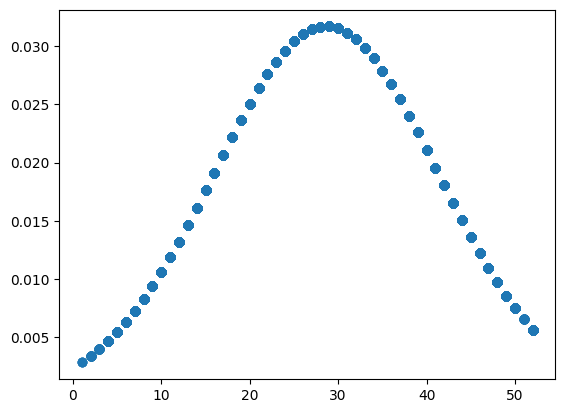

In [ ]:
#PDF normal distribution
def calculate_pdf_vectorized(data):
  µ = np.mean(data)
  sigma = np.std(data, ddof=1)
  coeff = 1 / (sigma * np.sqrt(2 * np.pi))


  exponent = np. exp(-((data - µ) ** 2) / (2 * sigma ** 2))

  return coeff * exponent

pdf_values = calculate_pdf_vectorized(HouseAge_array)

print(pdf_values)
plt. scatter (HouseAge_array, pdf_values)



In [ ]:
def min_max(array):
  min_value = np.min(array)
  max_value = np.max(array)
  return (array-min_value)/(max_value-min_value)
min_max(HouseAge_array)

array([0.78431373, 0.39215686, 1.        , ..., 0.31372549, 0.33333333,
       0.29411765])